# SLEP 014 Benchmark results

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = [14, 8]
plt.rcParams['lines.linewidth'] = 2.5

def plot_results(df, x, hue=None):
    fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True)
    sns.barplot(x=x, y='peak_memory', data=df, ax=ax1, hue=hue)
    ax1.set_title("Peak memory")
    sns.barplot(x=x, y='time', data=df, ax=ax2, hue=hue)
    ax2.set_title("Time")
    return ax1, ax2

## Sparse pipeline with text input


`max_features` is passed to `CountVectorizer`

```py
data = fetch_20newsgroups(subset='train')
set_config(array_out=array_out)
pipe = make_pipeline(CountVectorizer(max_features=max_features),
                     TfidfTransformer(),
                     SGDClassifier(random_state=42))
pipe.fit(data.data, data.target)
```

`array_out='pydata/sparse'` uses pydata.sparse (with no feature names). Without the feature names, it uses less memory than xarray. pandas is memory usage is way higher than the previous benchmark, but it is faster?

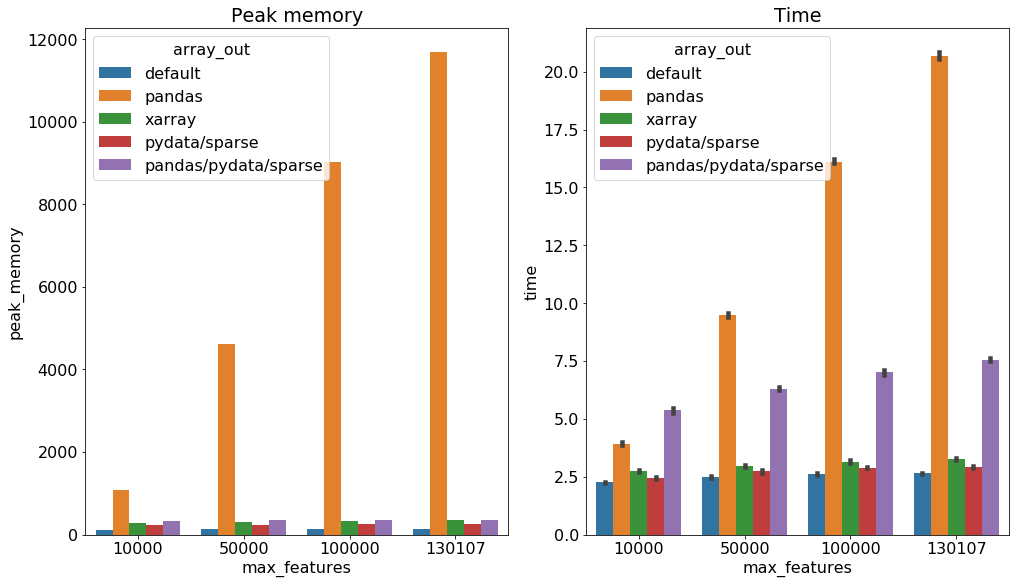

In [15]:
df = pd.read_csv("results/bench_sparse_text_input.csv")
_ = plot_results(df, x='max_features', hue='array_out')

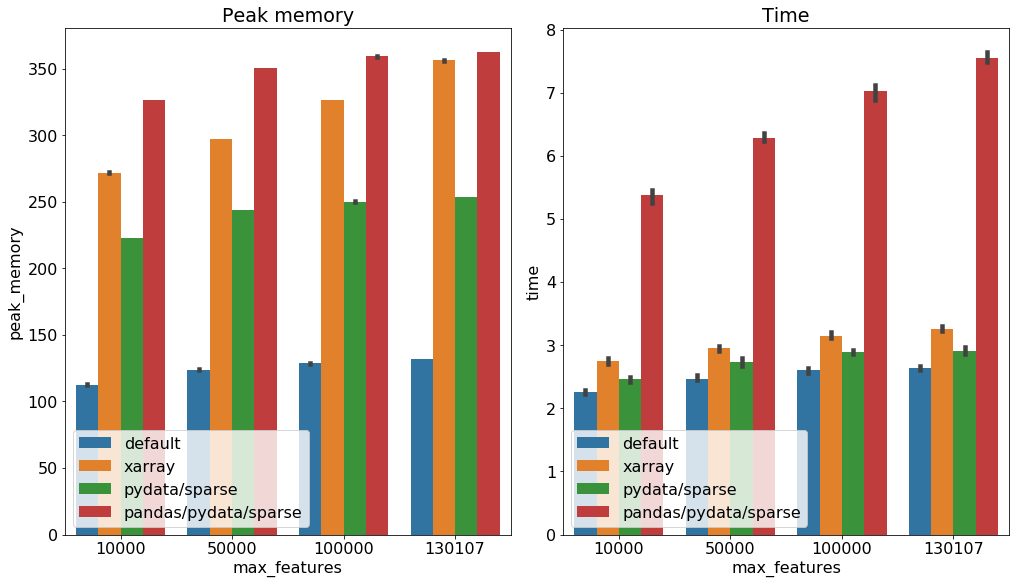

In [13]:
# without pandas
df_no_pandas = df[df['array_out'] != 'pandas']
ax1, ax2 = plot_results(df_no_pandas, x='max_features', hue='array_out')
_ = ax1.legend(loc='lower left')
_ = ax2.legend(loc='lower left')